In [ ]:
from spks import *
kilosort_path = Path('/home/data/JC131/20231004_181500/kilosort2.5/imec0/')

# load clusters in the folder
a = Clusters(kilosort_path,get_waveforms=False,load_template_features=True)

In [8]:
# this is not really needed because the flag  load_template_features=True already did this
# but used to recompute the depths if something changed
# estimate the spike amplitudes and depths from the templates 
a.compute_template_amplitudes_and_depths() 

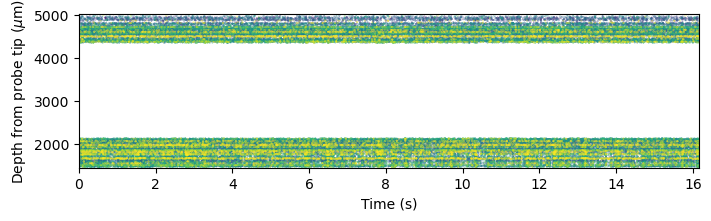

In [34]:
# plot the drift map
%matplotlib inline
plt.figure(figsize = [8,2])
n_spikes_to_plot = 100000

idx = np.random.choice(np.arange(len(a.spike_times)),np.min([n_spikes_to_plot,len(a.spike_times)]),replace=False)
idx = idx[np.argsort(np.take(a.spike_amplitudes,idx,axis=0))]
plt.scatter(a.spike_times[idx]/a.sampling_rate/60,
            a.spike_positions[idx,1], 0.03,
            a.spike_amplitudes[idx],clim=[0,2000])
plt.ylabel('Depth from probe tip ($\mu$m)')
plt.xlabel('Time (s)');
plt.axis([0,
          np.max(a.spike_times[idx]/a.sampling_rate/60), # max time
          np.min(a.channel_positions[:,1]), # max channel
          np.max(a.channel_positions[:,1])],# min channel 
        );